## Importar librerías

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Cargar Datos

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('../data/calidad_aire_2022_clean.csv', delimiter=',')
df.head(2)

,Unnamed: 0,CODIGO,FECHA,ANO,MES,DIA,DIA_SEMANA,HORA,ESTACION,SO2,PM10,O3,NO2,PM2.5,NOM_TIPO,LATITUD,LONGITUD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA,TEMPERATURA
0,0,28079008,2022-01-01 00:00:00,2022.0,1.0,1.0,Sabado,0,8.0,4.0,16.0,18.39,35.0,15.0,Urbana tráfico,40.4215533,-3.6823158,3.2,32.0,15.32,87.5,34.51,15.9
1,1,28079008,2022-01-01 00:00:00,2022.0,1.0,1.0,Sabado,0,8.0,4.0,16.0,18.39,35.0,15.0,Urbana tráfico,404.215.533,-36.823.158,3.2,32.0,15.32,87.5,34.51,15.9


In [3]:
# Eliminar la columna 'Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns

Index(['CODIGO', 'FECHA', 'ANO', 'MES', 'DIA', 'DIA_SEMANA', 'HORA',
       'ESTACION', 'SO2', 'PM10', 'O3', 'NO2', 'PM2.5', 'NOM_TIPO', 'LATITUD',
       'LONGITUD', 'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA',
       'TEMPERATURA'],
      dtype='object')

## Información básica:
* shape
* describe
* info

In [4]:
df.shape

(174144, 22)

In [5]:
df.describe()

,CODIGO,ANO,MES,DIA,HORA,ESTACION,SO2,PM10,O3,NO2,PM2.5,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA,TEMPERATURA
count,1.741440e+05,174144.0,174144.000000,174144.000000,174144.000000,174144.000000,174144.000000,174144.000000,174144.000000,174144.000000,174144.000000,174144.000000,174144.000000,174144.000000,174144.000000,174144.000000,174144.000000
mean,2.807902e+07,2022.0,6.513782,15.671444,11.500000,24.135061,3.977766,17.687316,53.527851,24.927864,8.266527,3.182212,35.374632,44.605510,62.319661,36.371770,16.489797
std,1.054818e+01,0.0,3.452887,8.796016,6.922206,10.548180,1.401553,15.417922,19.709846,14.949290,3.703237,1.121242,30.835843,16.424855,37.373225,11.781091,6.536963
min,2.807901e+07,2022.0,1.000000,1.000000,0.000000,8.000000,0.000000,1.000000,0.710000,1.000000,0.000000,0.000000,2.000000,0.590000,2.500000,11.520000,-8.400000
25%,2.807902e+07,2022.0,4.000000,8.000000,5.750000,18.000000,4.000000,16.000000,53.750000,22.000000,8.000000,3.200000,32.000000,44.790000,55.000000,33.750000,15.900000
50%,2.807902e+07,2022.0,7.000000,16.000000,11.500000,24.000000,4.000000,16.000000,53.750000,22.000000,8.000000,3.200000,32.000000,44.790000,55.000000,33.750000,15.900000
75%,2.807904e+07,2022.0,10.000000,23.000000,17.250000,35.000000,4.000000,16.000000,53.750000,22.000000,8.000000,3.200000,32.000000,44.790000,55.000000,35.970000,15.900000
max,2.807904e+07,2022.0,12.000000,31.000000,23.000000,36.000000,41.000000,678.000000,198.660000,172.000000,128.000000,32.800000,1356.000000,165.550000,430.000000,362.670000,42.200000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174144 entries, 0 to 174143
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CODIGO       174144 non-null  int64  
 1   FECHA        174144 non-null  object 
 2   ANO          174144 non-null  float64
 3   MES          174144 non-null  float64
 4   DIA          174144 non-null  float64
 5   DIA_SEMANA   174144 non-null  object 
 6   HORA         174144 non-null  int64  
 7   ESTACION     174144 non-null  float64
 8   SO2          174144 non-null  float64
 9   PM10         174144 non-null  float64
 10  O3           174144 non-null  float64
 11  NO2          174144 non-null  float64
 12  PM2.5        174144 non-null  float64
 13  NOM_TIPO     174144 non-null  object 
 14  LATITUD      174144 non-null  object 
 15  LONGITUD     174144 non-null  object 
 16  ICA_SO2      174144 non-null  float64
 17  ICA_PM10     174144 non-null  float64
 18  ICA_O3       174144 non-

## Análisis univariante

Iterar sobre las columnas numéricas:

* histplot
* boxplot

Iterar sobre las columnas numéricas:

* countplot

In [7]:
# Columnas numéricas
df.select_dtypes(include=np.number).columns.to_list()

['CODIGO',
 'ANO',
 'MES',
 'DIA',
 'HORA',
 'ESTACION',
 'SO2',
 'PM10',
 'O3',
 'NO2',
 'PM2.5',
 'ICA_SO2',
 'ICA_PM10',
 'ICA_O3',
 'ICA_NO2',
 'ICA',
 'TEMPERATURA']

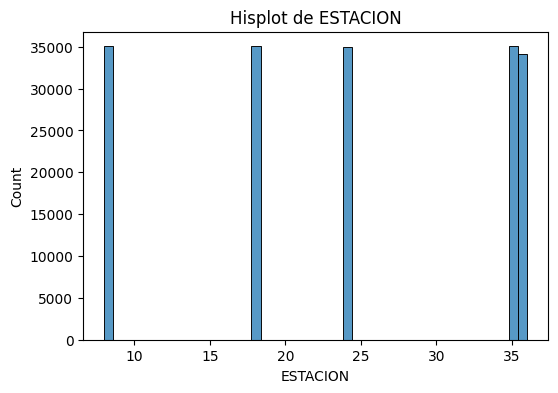

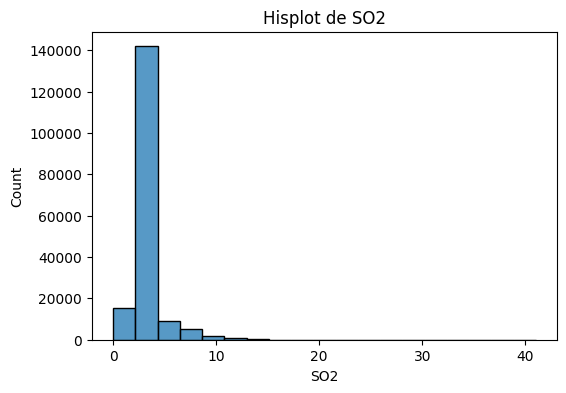

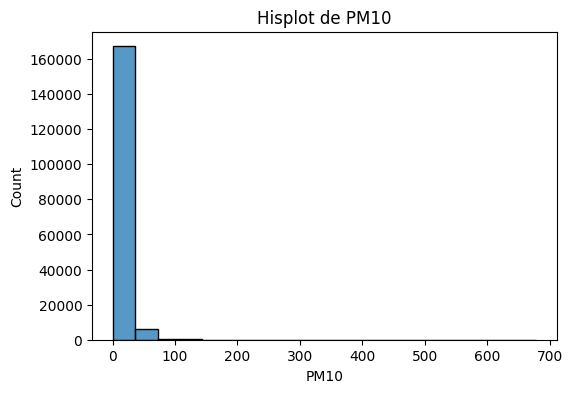

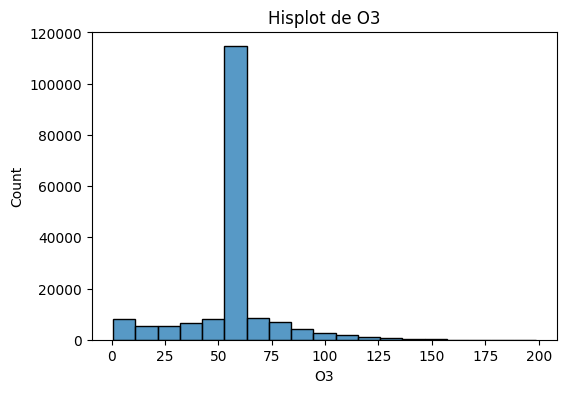

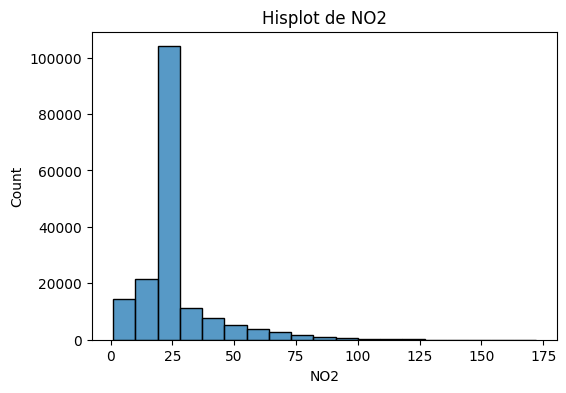

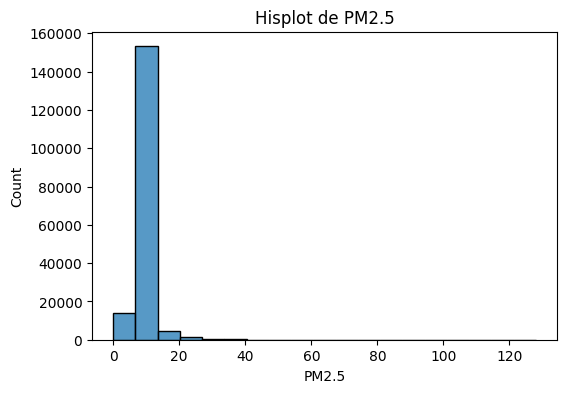

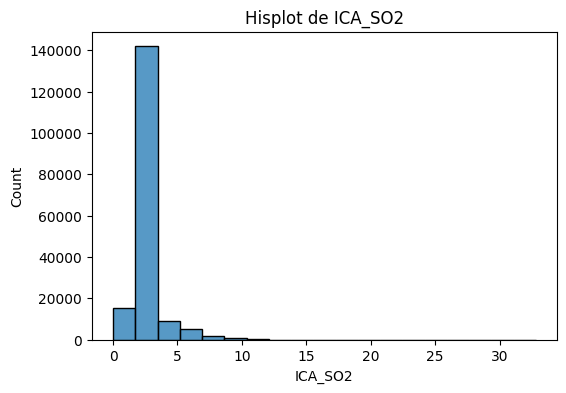

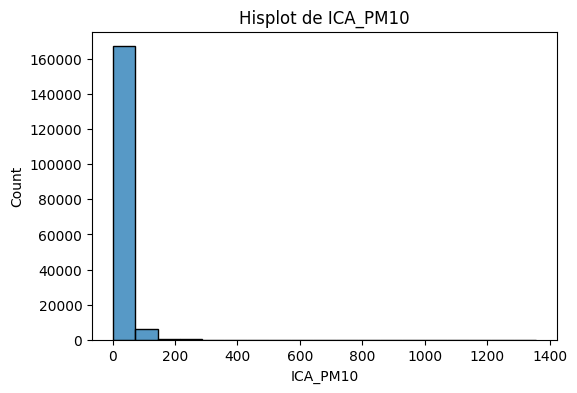

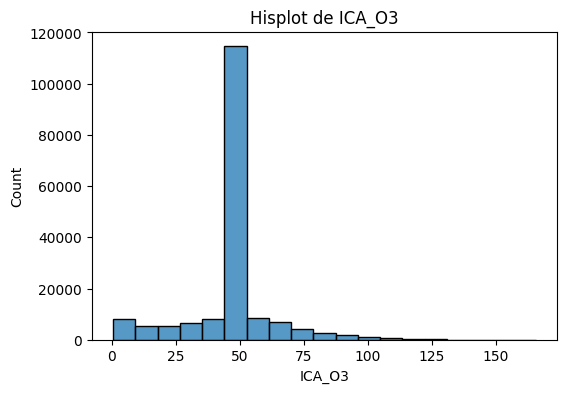

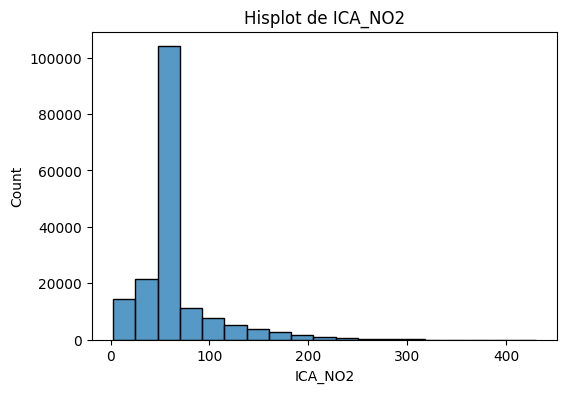

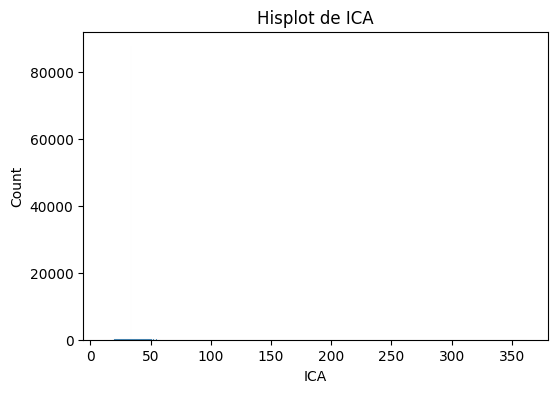

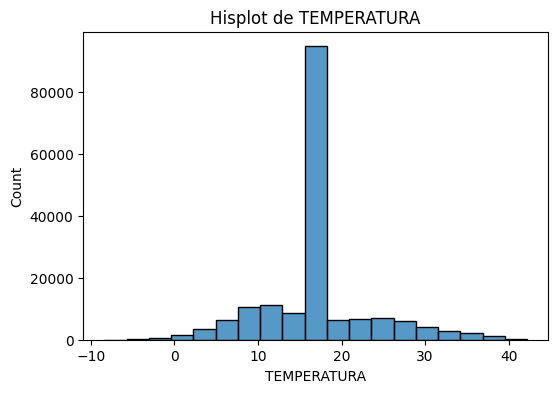

In [9]:
#numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
numeric_columns = ['ESTACION', 'SO2', 'PM10', 'O3', 'NO2', 'PM2.5', 'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA', 'TEMPERATURA']

for column in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=column)
    plt.title(f'Hisplot de {column}')
    plt.show()

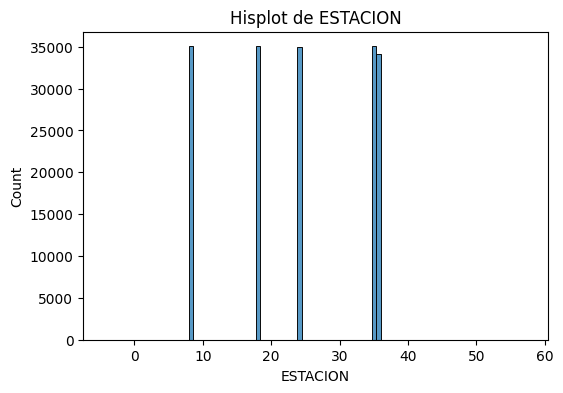

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2962794707.py:13: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


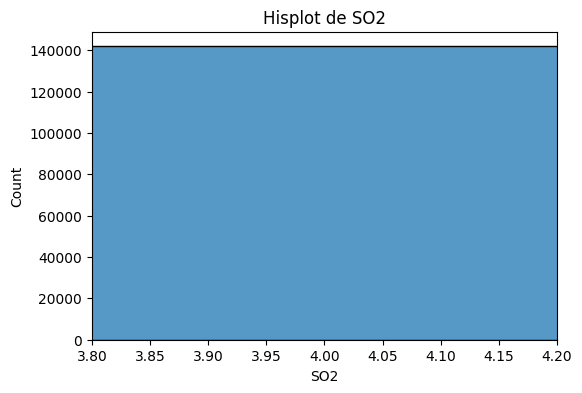

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2962794707.py:13: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


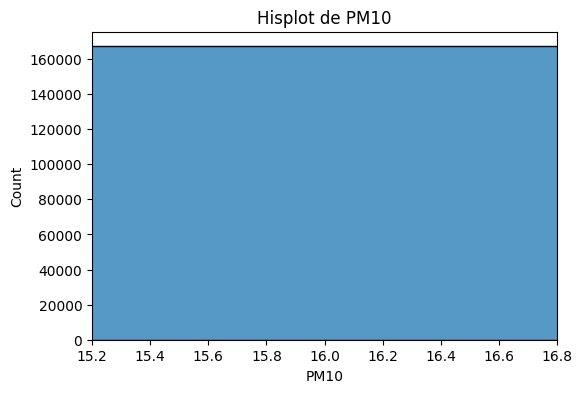

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2962794707.py:13: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


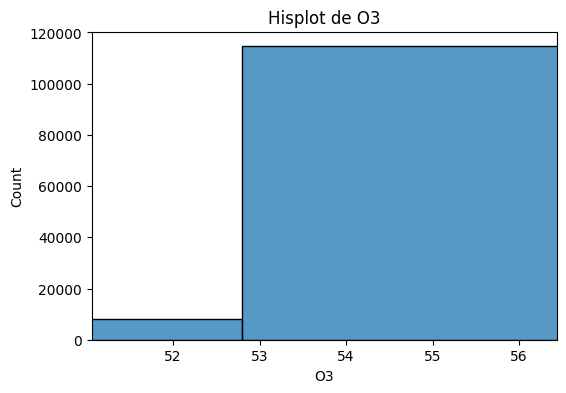

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2962794707.py:13: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


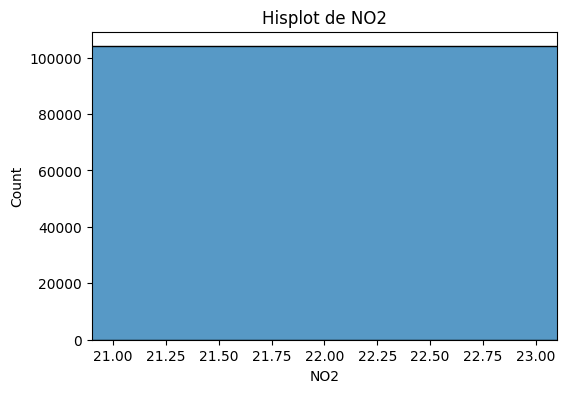

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2962794707.py:13: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


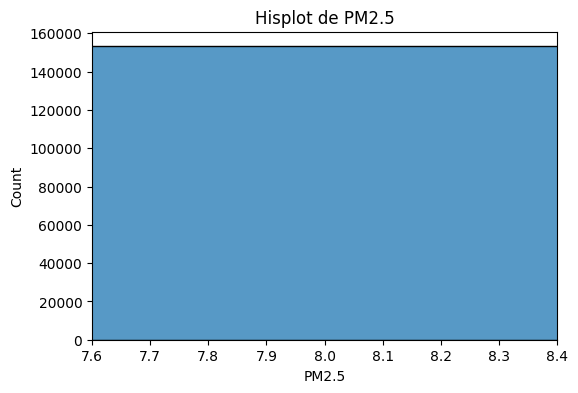

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2962794707.py:13: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


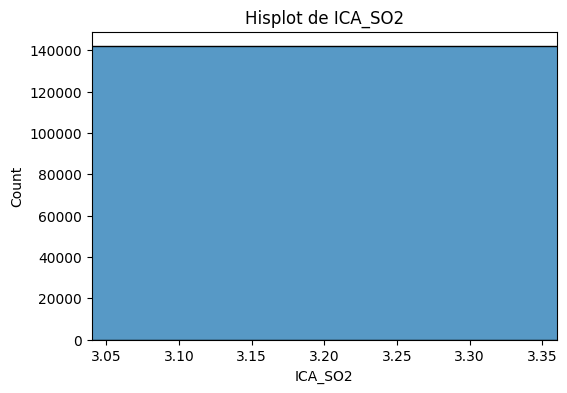

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2962794707.py:13: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


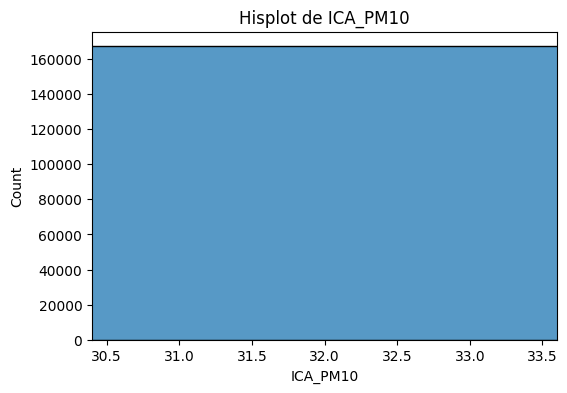

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2962794707.py:13: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


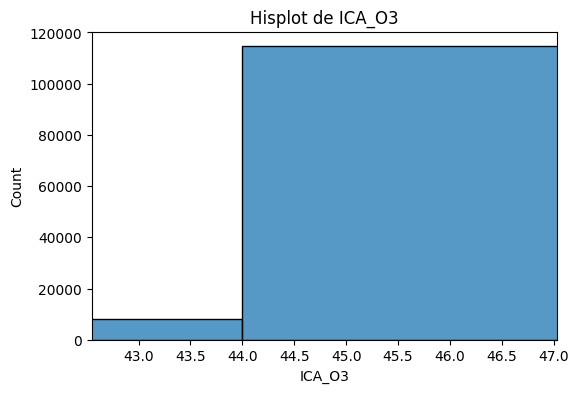

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2962794707.py:13: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


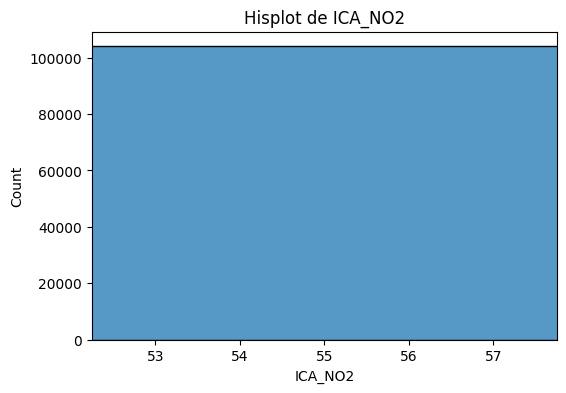

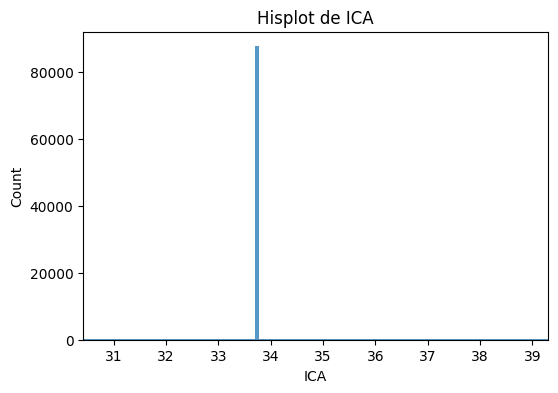

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2962794707.py:13: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


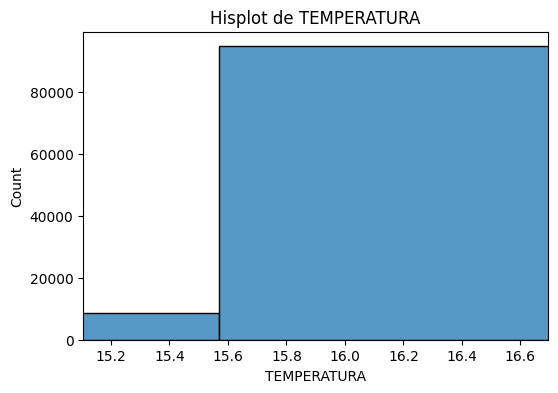

In [10]:
numeric_columns = ['ESTACION', 'SO2', 'PM10', 'O3', 'NO2', 'PM2.5', 'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA', 
                'TEMPERATURA']
for column in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=column)
    plt.title(f'Hisplot de {column}')
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    plt.xlim(lower_limit, upper_limit)
    
    plt.show()

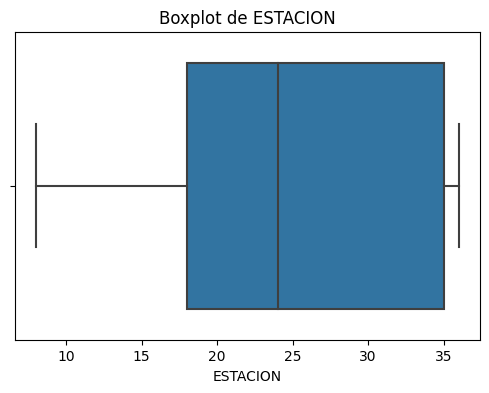

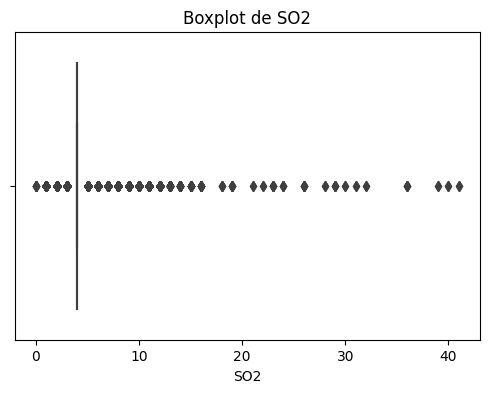

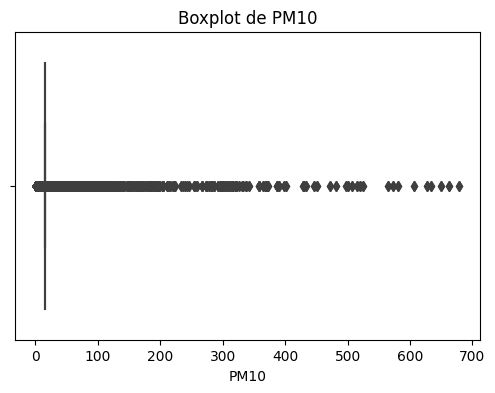

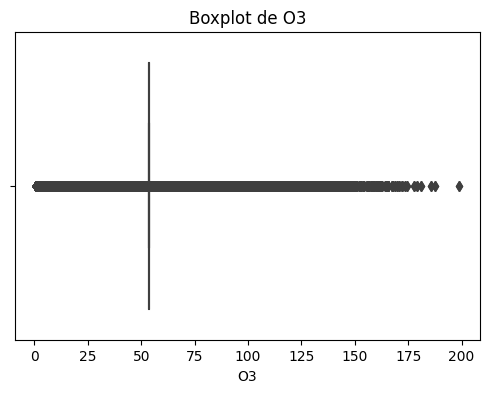

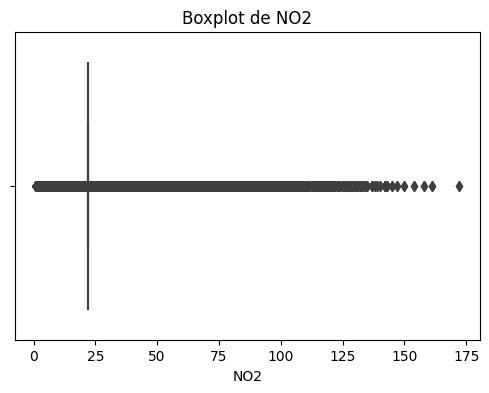

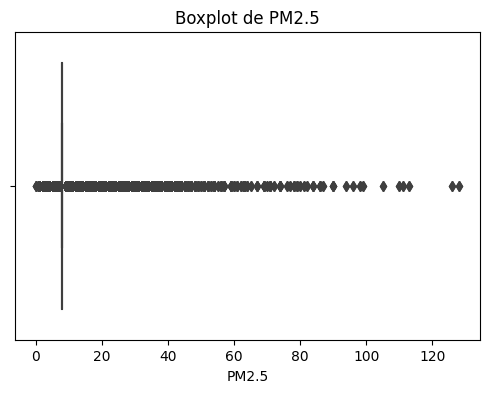

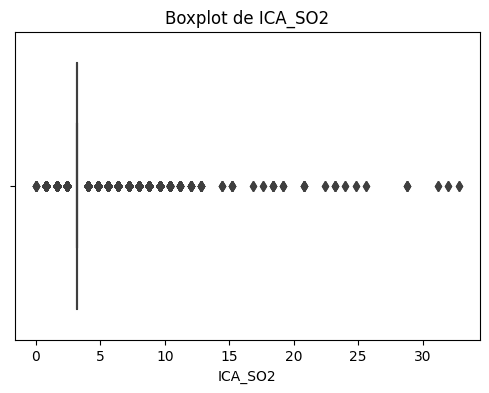

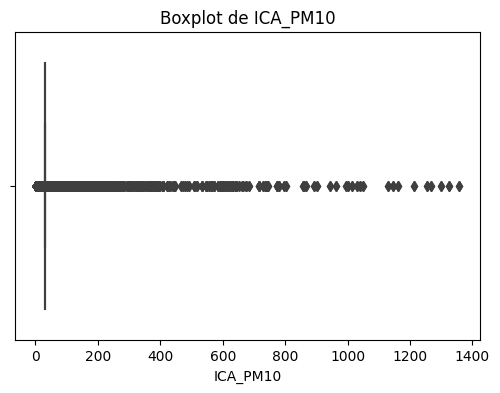

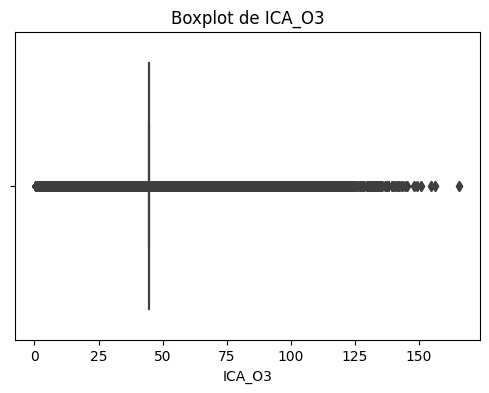

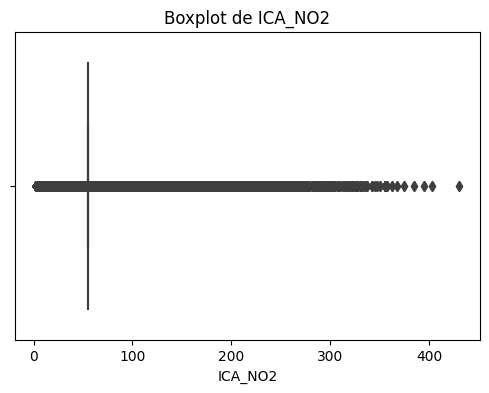

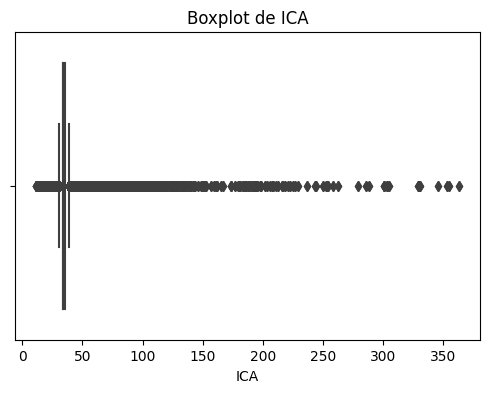

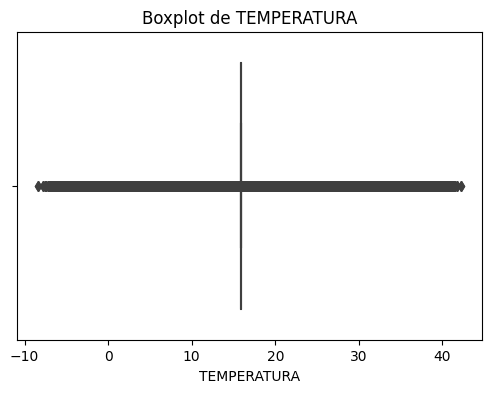

In [11]:
numeric_columns = ['ESTACION', 'SO2', 'PM10', 'O3', 'NO2', 'PM2.5', 'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA',
                'TEMPERATURA']
for column in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot de {column}')
    plt.show()

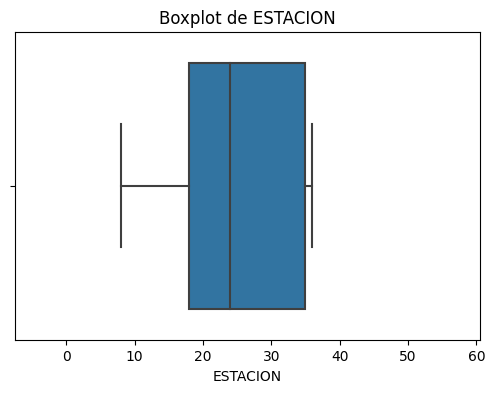

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2828531257.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


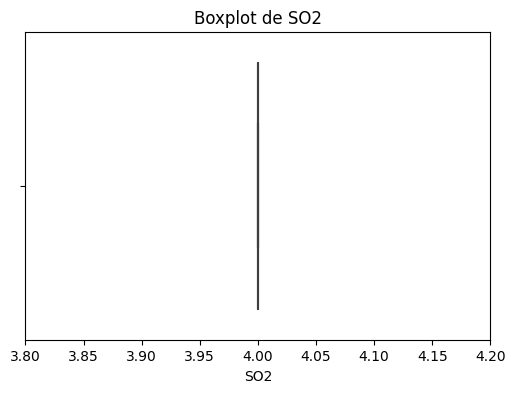

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2828531257.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


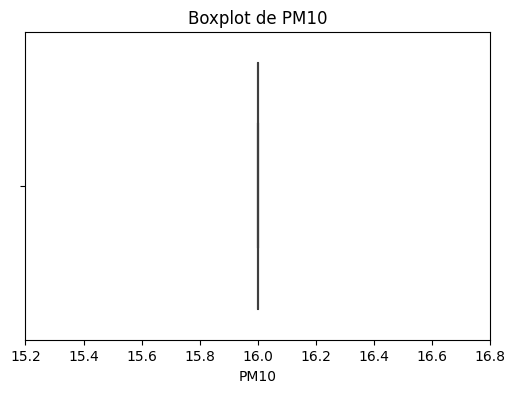

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2828531257.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


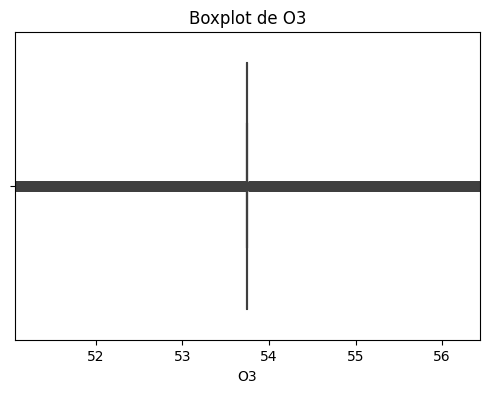

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2828531257.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


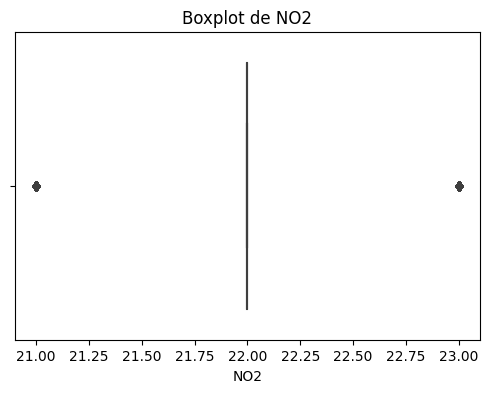

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2828531257.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


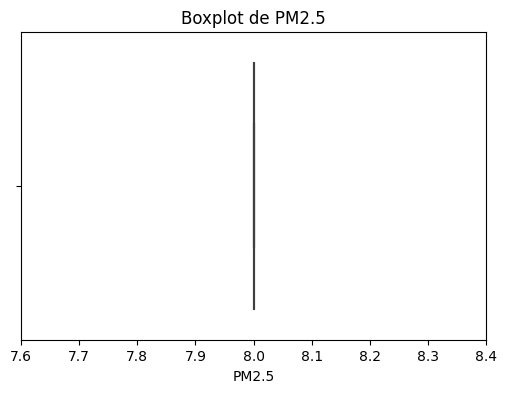

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2828531257.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


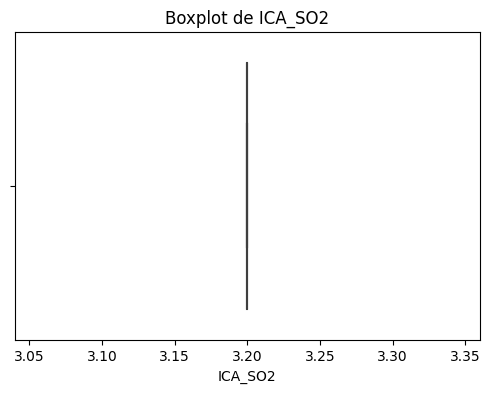

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2828531257.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


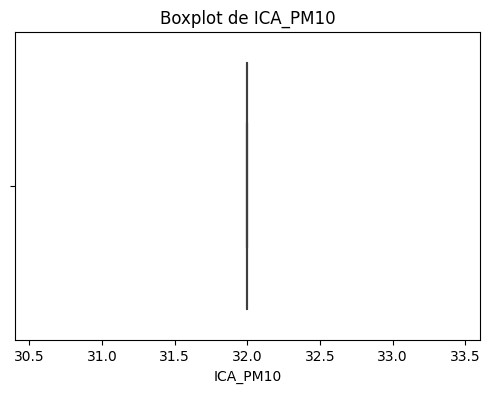

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2828531257.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


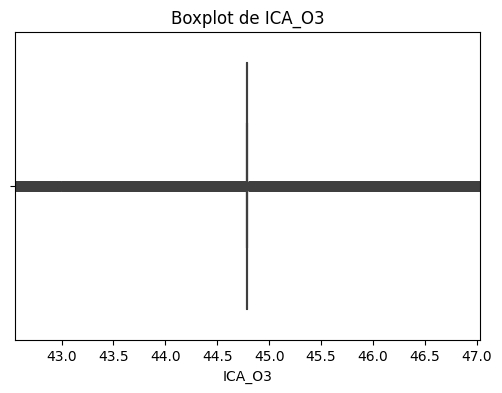

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2828531257.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


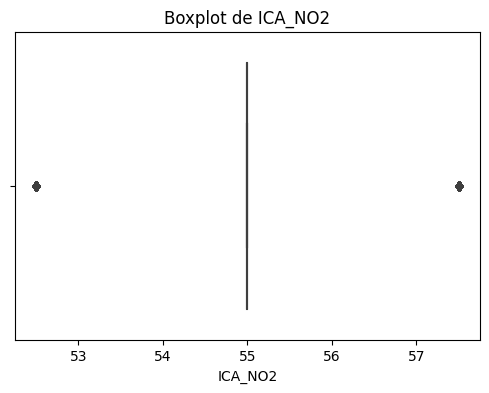

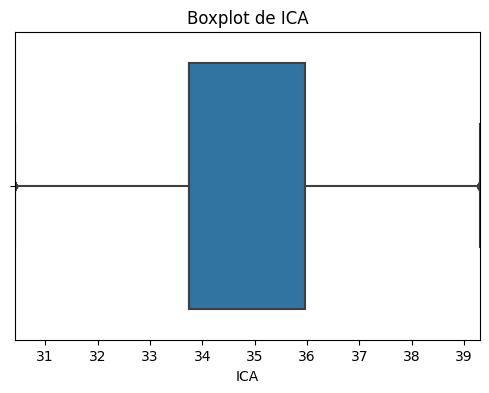

C:\Users\emona\AppData\Local\Temp\ipykernel_2660\2828531257.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(lower_limit, upper_limit)


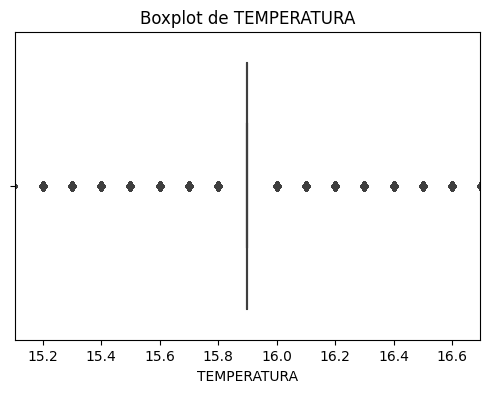

In [12]:
numeric_columns = ['ESTACION', 'SO2', 'PM10', 'O3', 'NO2', 'PM2.5', 'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA', 
                'TEMPERATURA']

for column in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot de {column}')
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    plt.xlim(lower_limit, upper_limit)
    
    plt.show()

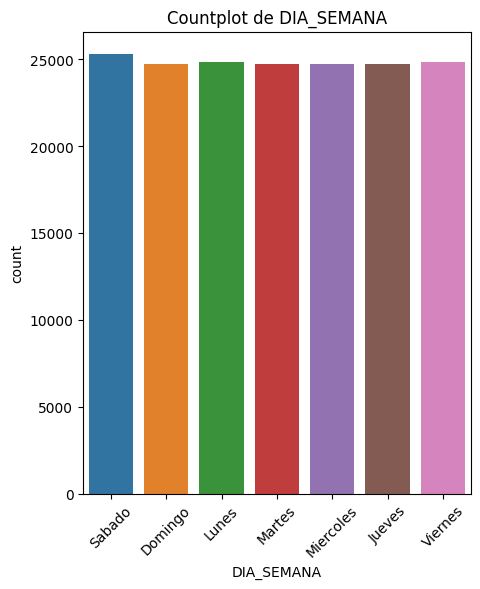

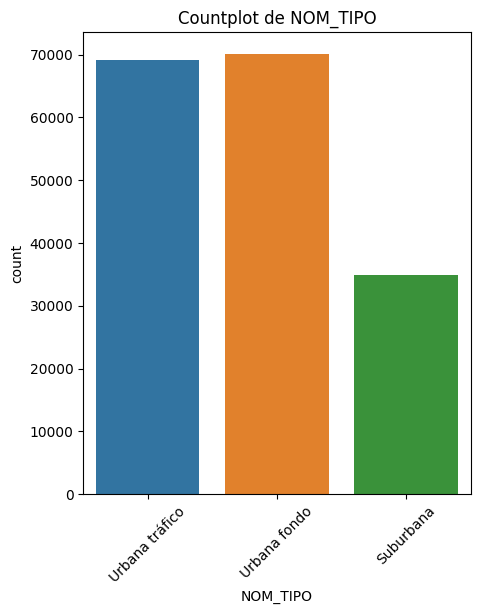

In [13]:
categorical_columns = df.select_dtypes(include='object').columns.to_list()

for column in categorical_columns:
    if df[column].nunique() < 10:
        plt.figure(figsize=(5,6))
        sns.countplot(data=df, x=column)
        plt.title('Countplot de ' + column)
        plt.xticks(rotation=45)
        plt.show()

In [14]:
df['FECHA'] = pd.to_datetime(df['FECHA'], dayfirst=False)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174144 entries, 0 to 174143
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CODIGO       174144 non-null  int64         
 1   FECHA        174144 non-null  datetime64[ns]
 2   ANO          174144 non-null  float64       
 3   MES          174144 non-null  float64       
 4   DIA          174144 non-null  float64       
 5   DIA_SEMANA   174144 non-null  object        
 6   HORA         174144 non-null  int64         
 7   ESTACION     174144 non-null  float64       
 8   SO2          174144 non-null  float64       
 9   PM10         174144 non-null  float64       
 10  O3           174144 non-null  float64       
 11  NO2          174144 non-null  float64       
 12  PM2.5        174144 non-null  float64       
 13  NOM_TIPO     174144 non-null  object        
 14  LATITUD      174144 non-null  object        
 15  LONGITUD     174144 non-null  obje

In [16]:
df.select_dtypes(include='datetime64').columns.to_list()

['FECHA']

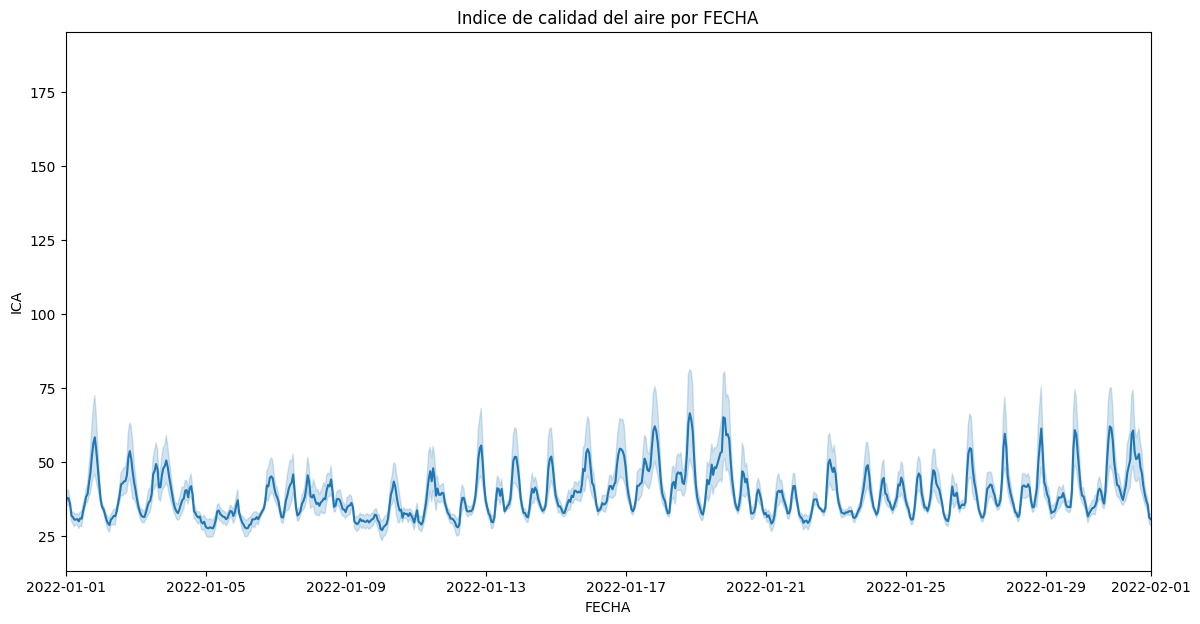

In [17]:
date_columns = df.select_dtypes(include='datetime64').columns.to_list()

for column in date_columns:
    plt.figure(figsize=(14,7))
    
    # necesaria index tipo fecha
    # df.set_index(column, inplace=True)
    # df[column]['2011-01-01':'2012-01-01'].plot()
    
    sns.lineplot(data=df, x=column, y='ICA')
    plt.title('Indice de calidad del aire por ' + column)
    plt.xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2022-02-01'))
    plt.show()

In [18]:
# ICA agrupadas por número de semana
df_orderdate = df.copy()
df_orderdate.set_index('FECHA', inplace=True)
df_weekly_sales = df_orderdate.resample('W')['ICA'].sum()
# df_weekly_profit = df_orderdate.resample('W')['Profit'].sum()
df_weekly_sales

FECHA
2022-01-02     37340.14
2022-01-09    119230.72
2022-01-16    128551.52
2022-01-23    137686.40
2022-01-30    134003.28
2022-02-06    135264.24
2022-02-13    140617.18
2022-02-20    122490.12
2022-02-27    125961.48
2022-03-06    118556.42
2022-03-13    114135.02
2022-03-20    158895.96
2022-03-27    114622.52
2022-04-03    119182.92
2022-04-10    111747.44
2022-04-17    110266.14
2022-04-24    109679.54
2022-05-01    123618.12
2022-05-08    111392.14
2022-05-15    128811.86
2022-05-22    124852.00
2022-05-29    111345.00
2022-06-05    113007.20
2022-06-12    116458.80
2022-06-19    146792.02
2022-06-26    107639.22
2022-07-03    115440.34
2022-07-10    122288.40
2022-07-17    134567.56
2022-07-24    125661.72
2022-07-31    117072.14
2022-08-07    124799.70
2022-08-14    125019.86
2022-08-21    112306.46
2022-08-28    117058.14
2022-09-04    117322.98
2022-09-11    112335.88
2022-09-18    114505.48
2022-09-25     99516.68
2022-10-02    102914.30
2022-10-09    142817.44
2022-10-16

<Axes: xlabel='FECHA'>

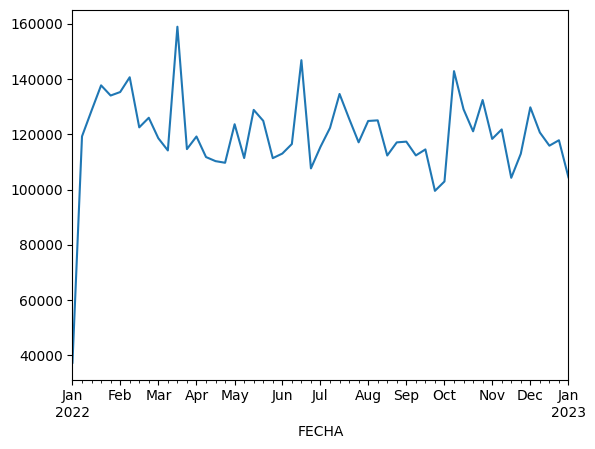

In [19]:
df_weekly_sales.plot()

<Axes: xlabel='FECHA'>

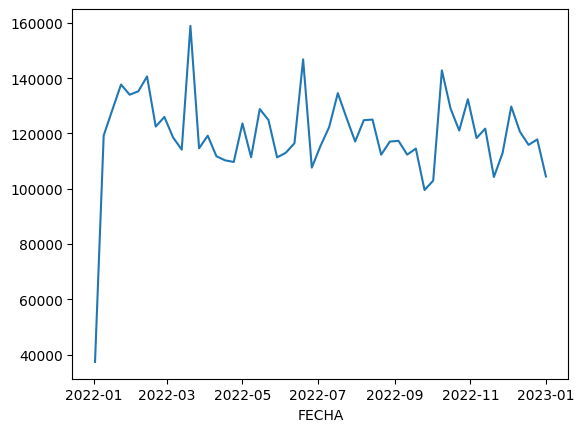

In [20]:
sns.lineplot(x=df_weekly_sales.index, y=df_weekly_sales.values)

In [22]:
# Ventas agrupando por mes
df_orderdate = df.copy()
df_orderdate.set_index('FECHA', inplace=True)
df_monthly_sales = df_orderdate.resample('M')['ICA'].sum()
#df_monthly_profit = df_orderdate.resample('M')['Profit'].sum()
df_monthly_sales

FECHA
2022-01-31    578454.84
2022-02-28    521073.82
2022-03-31    562120.44
2022-04-30    482157.62
2022-05-31    527874.32
2022-06-30    516628.76
2022-07-31    548867.76
2022-08-31    532506.14
2022-09-30    457288.84
2022-10-31    578539.54
2022-11-30    497003.10
2022-12-31    531410.40
Freq: M, Name: ICA, dtype: float64

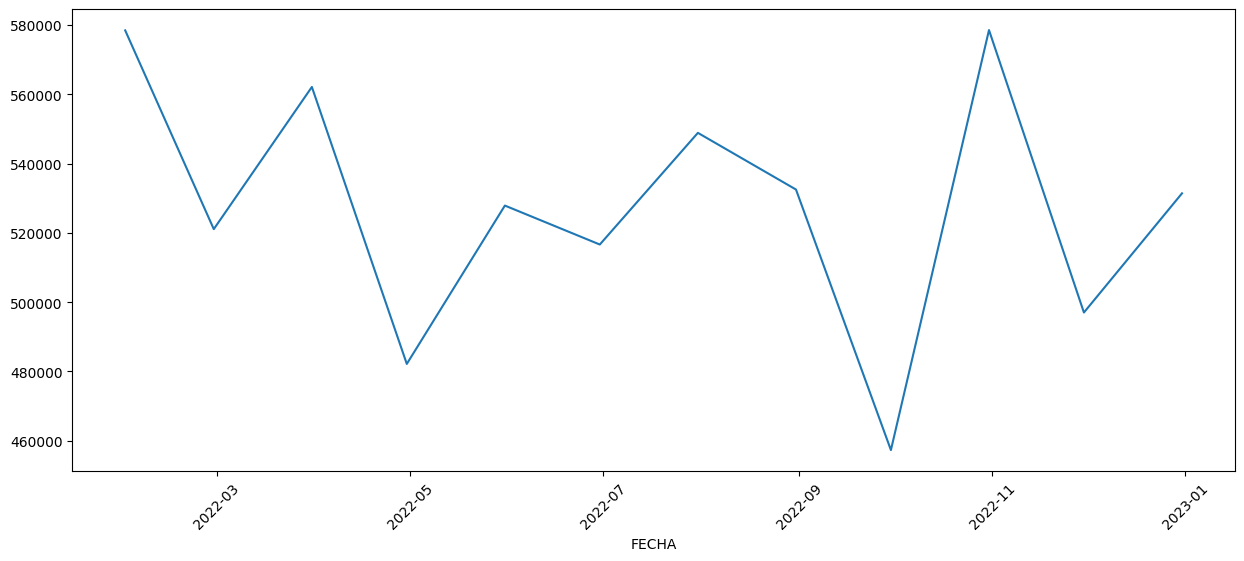

In [23]:
plt.figure(figsize=(15, 6))
sns.lineplot(x=df_monthly_sales.index, y=df_monthly_sales.values)
#sns.lineplot(x=df_monthly_profit.index, y=df_monthly_profit.values)
plt.xticks(rotation=45);